In [5]:
import os
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fixing the path:
if os.getcwd()[-1] in '0123456798':
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)

In [6]:
tokens_df = pd.read_csv('BigData/top_community_tokens.csv', usecols=["Tokens", "Communities"], converters={"Communities": literal_eval, 'Tokens': literal_eval})

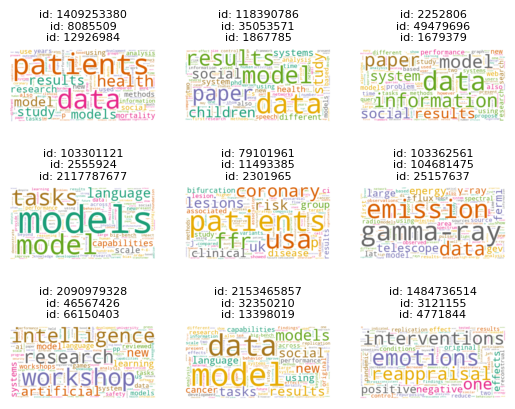

In [7]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3)
for i, ax in enumerate(axs.flat):
    # Generate a word cloud from the token frequencies
    wordcloud = WordCloud(background_color="white", colormap="Dark2").generate_from_frequencies(tokens_df["Tokens"][i])
    
    # Display the word cloud in the subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    name_list = list(tokens_df["Communities"][i])[:3]
    ax.set_title(f"id: {name_list[0]}\nid: {name_list[1]}\nid: {name_list[2]}", fontsize = 8)
    ax.axis("off")

# Adjust the spacing between subplots and add a title to the figure
fig.subplots_adjust(hspace=.5)
# fig.subplots_adjust(wspace=)
plt.show()

### Comment on your results

Well, based on the shortcomings of the TF-IDF method I chose to just use the TF to make the word clouds, and I think these results are satisfying. They are somewhat telling of what types of fields the groups are related to. The one about "gamma-ray" and "emission" is most likely astronomy etc.

### Look up the top authors in each community



In [28]:
import requests

lister = []
author_list = [list(i)[0] for i in tokens_df["Communities"]]

for id in author_list:
    url = f'https://api.semanticscholar.org/v1/author/{id}'
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        name = data.get('name')
    else:
        print("author_id missing error")
        continue
    lister.append((id, (name, [paper.get("title") for paper in data.get("papers")])))

In [32]:
df2 = pd.DataFrame(dict(lister)).T
df2

,0,1
1409253380,R. Myers,[TRACE: A Stigmergic Crowdsourcing Platform fo...
118390786,H. Quiroz-Mercado,[Bilateral macular hole formation secondary to...
2252806,S. Pujari,[The influence of social status on consensus b...
103301121,Johann D. Gaebler,"[MATH 112 : HOMEWORK 2 SOLUTIONS, Partially bo..."
79101961,S. Kweon,[Effect and regulatory mechanism of heat shock...
103362561,Xue Fengli,[The Analyzation of the Syndrome Differentiati...
2090979328,P. Thornton,"[Workshop participants, A Peer-reviewed Newspa..."
2153465857,Jing Liu,[Gauging Public Opinion in the Age of Social M...
1484736514,O. Care,"[Joint Intervention on Questions #3 & #4, Crea..."
145199105,M. Messer,[[Report from the supportive ambulatory nursin...


After looking up the top authors and looking at the papers they've released it's not clear whether or not they match the group, but nothing seems completely out of the ordinary.